# 5.1 이항 분류

In [1]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

In [3]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [4]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [7]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1, random_state=126)
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

[[0.38842975 0.1        0.20481928 0.0107362  0.04318937 0.18402778
  0.23963134 0.08964719 0.27131783 0.18539326 0.43478261 0.66666667
  1.        ]
 [0.28099174 0.36       0.03614458 0.03220859 0.11295681 0.04861111
  0.18202765 0.1995373  0.6124031  0.17977528 0.2173913  0.33333333
  0.        ]
 [0.18181818 0.17333333 0.39759036 0.23466258 0.06146179 0.08680556
  0.3640553  0.20802005 0.3255814  0.15730337 0.11594203 0.5
  1.        ]
 [0.31404959 0.22       0.14457831 0.01840491 0.1179402  0.01041667
  0.01152074 0.17524581 0.43410853 0.20786517 0.2173913  0.33333333
  0.        ]
 [0.28099174 0.08       0.13253012 0.01533742 0.05813953 0.05555556
  0.21889401 0.14652015 0.50387597 0.1741573  0.28985507 0.33333333
  1.        ]]


In [8]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.38842975 0.1        0.20481928 0.0107362  0.04318937 0.18402778
 0.23963134 0.08964719 0.27131783 0.18539326 0.43478261 0.66666667]
1.0
[0.38016529 0.08       0.22891566 0.17177914 0.07641196 0.17361111
 0.37788018 0.25621747 0.48062016 0.33707865 0.13043478 0.5       ]
1.0
[0. 1.]
[0. 1.]


In [11]:
import tensorflow as tf
tf.random.set_seed(126)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [12]:
tf.random.set_seed(126)
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 2s 3ms/step - loss: 0.1466 - accuracy: 0.9394 - val_loss: 0.0796 - val_accuracy: 0.9862
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9841 - val_loss: 0.1346 - val_accuracy: 0.9715
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9856 - val_loss: 0.0821 - val_accuracy: 0.9869
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9879 - val_loss: 0.0874 - val_accuracy: 0.9862
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9877 - val_loss: 0.0636 - val_accuracy: 0.9831
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9897 - val_loss: 0.0592 - val_accuracy: 0.9900
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.0720 - val_accuracy: 0.9854
Epoch 

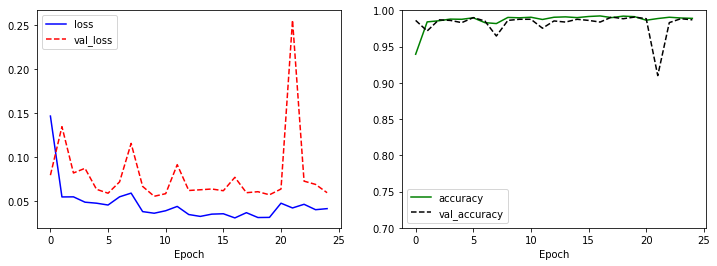

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [14]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.9923


[0.02750876545906067, 0.9923076629638672]